# COSC 3337 Kaggle Competition #1 Minh Nguyen

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

In [55]:
#Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
train.head(10)

,Unnamed: 0,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,277,7490840,Palm Jumeirah,25.115747,55.142615,1890000,1587,1,1,Medium,...,False,True,True,True,False,False,False,True,True,False
1,1758,7695422,Business Bay,25.177373,55.272707,1150000,943,1,2,Medium,...,False,True,True,True,False,False,False,True,False,False
2,358,7516456,Jumeirah Beach Residence,25.078122,55.134763,2500000,1817,2,3,Medium,...,False,True,True,True,False,False,False,True,True,False
3,1546,7679416,Palm Jumeirah,25.109267,55.145799,1500000,1583,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,236,7453919,Motor City,25.046706,55.246714,629000,1051,1,1,Low,...,False,False,False,True,False,False,False,False,False,False
5,551,7582465,Old Town,25.189195,55.274878,1500000,1313,2,3,Medium,...,False,False,False,True,False,False,False,False,False,False
6,1778,7696898,Dubai Hills Estate,25.109367,55.247980,1850000,1638,3,4,Medium,...,False,True,True,True,False,False,False,False,False,False
7,1649,7686926,Business Bay,25.183515,55.266670,999000,696,1,1,Medium,...,False,False,True,True,False,False,False,False,False,False
8,208,7428843,DIFC,25.212018,55.278772,2400000,2030,2,3,Low,...,False,False,True,True,False,False,False,False,False,False
9,1319,7665124,Dubai Harbour,25.096700,55.139276,1483888,745,1,2,Medium,...,False,True,True,False,False,False,False,True,True,False


In [57]:
#check the shape
train.shape

(1333, 38)

In [58]:
# what are the datatypes
train.dtypes

Unnamed: 0               int64
id                       int64
neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_s

In [59]:
# Take a quick idea on all columns
train.describe(include="all")

,Unnamed: 0,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
count,1333.000000,1.333000e+03,1333,1333.000000,1333.000000,1.333000e+03,1333.000000,1333.000000,1333.000000,1333,...,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
unique,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,4,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,Downtown Dubai,NaN,NaN,NaN,NaN,NaN,NaN,Medium,...,False,False,True,True,False,False,False,False,False,False
freq,NaN,NaN,224,NaN,NaN,NaN,NaN,NaN,NaN,796,...,1276,873,874,979,1195,1189,1274,1068,868,1123
mean,948.138785,7.567538e+06,NaN,25.119183,55.214017,2.098969e+06,1408.276819,1.795199,2.508627,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,553.400804,2.088437e+05,NaN,0.062306,0.069401,2.848372e+06,877.361851,0.930421,1.052364,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,5.528049e+06,NaN,24.942372,55.069311,2.200000e+05,296.000000,0.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,468.000000,7.557592e+06,NaN,25.073156,55.145574,9.000000e+05,838.000000,1.000000,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,948.000000,7.630980e+06,NaN,25.099422,55.209550,1.400206e+06,1270.000000,2.000000,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1426.000000,7.670260e+06,NaN,25.189617,55.272126,2.200000e+06,1690.000000,2.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
## The target column is the "Price". So, let's get rid of that 
train_without_price = train.drop(["price"], axis=1)
train_without_price.shape

(1333, 37)

In [61]:
test.shape

(572, 37)

<AxesSubplot:ylabel='Count'>

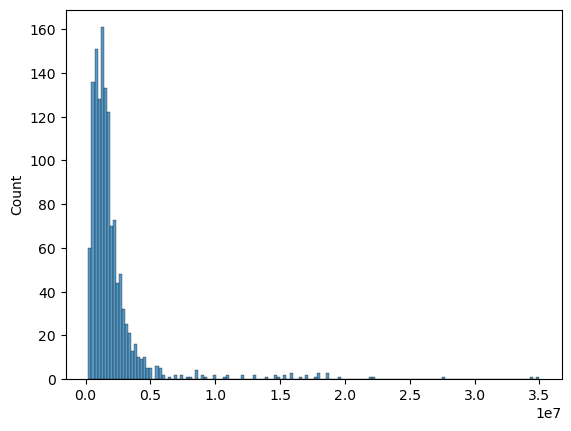

In [62]:
sns.histplot(train.price.values)

/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

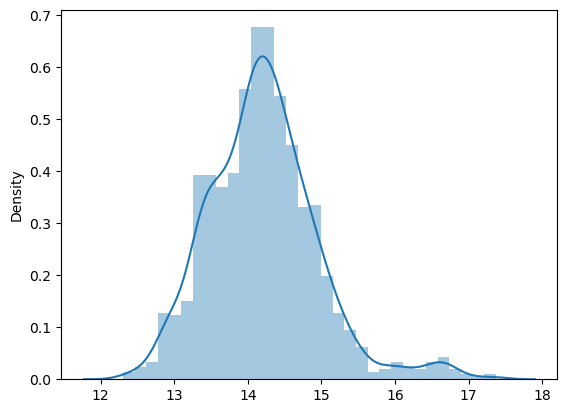

In [63]:
log_price = np.log(train.price.values)
sns.distplot(log_price)

In [64]:
test.head()

,Unnamed: 0,id,neighborhood,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,1226,7658042,Business Bay,25.183515,55.266670,584,0,1,Medium,False,...,False,False,True,True,False,False,False,False,False,False
1,111,7267378,Business Bay,25.176728,55.271595,458,0,1,Low,False,...,False,False,False,False,False,False,False,False,False,False
2,1838,7700077,Jumeirah Lake Towers,25.079130,55.154713,415,0,1,High,False,...,False,True,True,True,False,False,False,True,False,False
3,1675,7688518,Motor City,25.047600,55.248748,1642,2,3,Low,False,...,False,False,True,True,False,False,False,False,False,False
4,415,7542932,Jumeirah Beach Residence,25.076944,55.134135,1503,2,3,Low,False,...,False,False,True,True,False,False,False,False,True,False


In [65]:
combined = pd.concat([train_without_price, test], axis=0)
combined

,Unnamed: 0,id,neighborhood,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,277,7490840,Palm Jumeirah,25.115747,55.142615,1587,1,1,Medium,False,...,False,True,True,True,False,False,False,True,True,False
1,1758,7695422,Business Bay,25.177373,55.272707,943,1,2,Medium,False,...,False,True,True,True,False,False,False,True,False,False
2,358,7516456,Jumeirah Beach Residence,25.078122,55.134763,1817,2,3,Medium,False,...,False,True,True,True,False,False,False,True,True,False
3,1546,7679416,Palm Jumeirah,25.109267,55.145799,1583,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
4,236,7453919,Motor City,25.046706,55.246714,1051,1,1,Low,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1591,7682980,Dubai Marina,25.090418,55.148740,971,1,3,Medium,False,...,False,False,True,True,False,False,False,True,True,False
568,1355,7667356,Bluewaters,25.077424,55.123240,1155,1,2,Medium,False,...,False,False,True,True,False,False,False,False,True,False
569,914,7627208,Al Sufouh,25.108984,55.177657,1201,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
570,493,7566522,Town Square,25.010570,55.289787,1462,3,3,Low,False,...,False,False,True,True,False,False,False,True,False,False


In [66]:
combined_obj = combined[["neighborhood", "quality"]]
combined_obj = pd.get_dummies(combined_obj)
combined_obj.head()

,neighborhood_Al Barari,neighborhood_Al Barsha,neighborhood_Al Furjan,neighborhood_Al Kifaf,neighborhood_Al Quoz,neighborhood_Al Sufouh,neighborhood_Arjan,neighborhood_Barsha Heights (Tecom),neighborhood_Bluewaters,neighborhood_Business Bay,...,neighborhood_The Hills,neighborhood_The Views,neighborhood_Town Square,neighborhood_Umm Suqeim,neighborhood_World Trade Center,neighborhood_wasl gate,quality_High,quality_Low,quality_Medium,quality_Ultra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
# Now, drop the unwanted columns from the main train set
combined_nonObj = combined.drop(["Unnamed: 0", "id", "neighborhood", "quality"], axis=1)
combined_nonObj.head()

,latitude,longitude,size_in_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,25.115747,55.142615,1587,1,1,False,True,True,False,True,...,False,True,True,True,False,False,False,True,True,False
1,25.177373,55.272707,943,1,2,False,False,True,False,True,...,False,True,True,True,False,False,False,True,False,False
2,25.078122,55.134763,1817,2,3,False,True,True,False,False,...,False,True,True,True,False,False,False,True,True,False
3,25.109267,55.145799,1583,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.046706,55.246714,1051,1,1,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [68]:
combined_conc = pd.concat([combined_obj, combined_nonObj], axis=1)
combined_conc.head()

,neighborhood_Al Barari,neighborhood_Al Barsha,neighborhood_Al Furjan,neighborhood_Al Kifaf,neighborhood_Al Quoz,neighborhood_Al Sufouh,neighborhood_Arjan,neighborhood_Barsha Heights (Tecom),neighborhood_Bluewaters,neighborhood_Business Bay,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,0,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,False,False,True,True,False
1,0,0,0,0,0,0,0,0,0,1,...,False,True,True,True,False,False,False,True,False,False
2,0,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,False,False,True,True,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [69]:
combined_conc.shape

(1905, 91)

In [70]:
train_final = combined_conc[:train.shape[0]]
test_final = combined_conc[train.shape[0]:]

In [71]:
y = log_price
X = train_final.values
print("Feature shape is", X.shape)
print("Target shape is", y.shape)

Feature shape is (1333, 91)
Target shape is (1333,)


**Time for regression model**

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [73]:
reg = LinearRegression().fit(X, y)

In [74]:
pred = reg.predict(X)

In [75]:
math.sqrt(mean_squared_error(y, pred)) 

0.26772746904748734

In [76]:
math.sqrt(mean_squared_error(np.exp(y), np.exp(pred))) 

1294805.9906839048

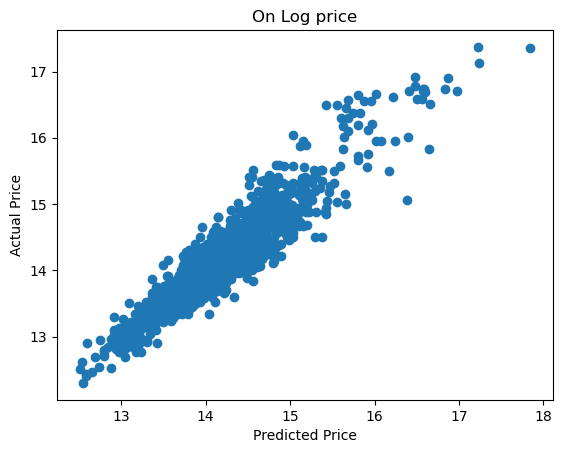

In [77]:
plt.scatter(pred, y)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("On Log price")
plt.show()

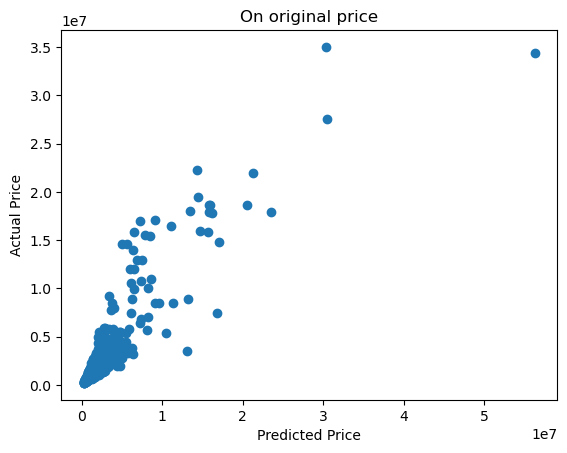

In [78]:
plt.scatter(np.exp(pred), np.exp(y))
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("On original price")
plt.show()

In [79]:
test_X = test_final.values
pred = reg.predict(test_X)
pred.shape

(572,)

In [80]:
pred_org = np.exp(pred)

In [81]:
df = pd.DataFrame()
df["sid"] = test["Unnamed: 0"]
df["price"] = pred_org
df.to_csv("Nguyen_Minh_2069407.csv", index=False)

In [82]:
df

,sid,price
0,1226,6.901622e+05
1,111,7.035342e+05
2,1838,4.411090e+05
3,1675,9.091299e+05
4,415,2.360494e+06
...,...,...
567,1591,1.027398e+06
568,1355,2.243668e+06
569,914,1.214361e+06
570,493,1.246609e+06
